In [1]:
!pip install tf_explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.1 MB/s eta 0:00:00


In [3]:
# !pip install opencv (local pc)

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

# XAI 알고리즘 불러오는 부분(폐쇄성 민감도 방식)
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 6), reused 19 (delta 2), pack-reused 0
Receiving objects: 100% (29/29), 467.72 KiB | 6.78 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [5]:
path = '/content/data/img'

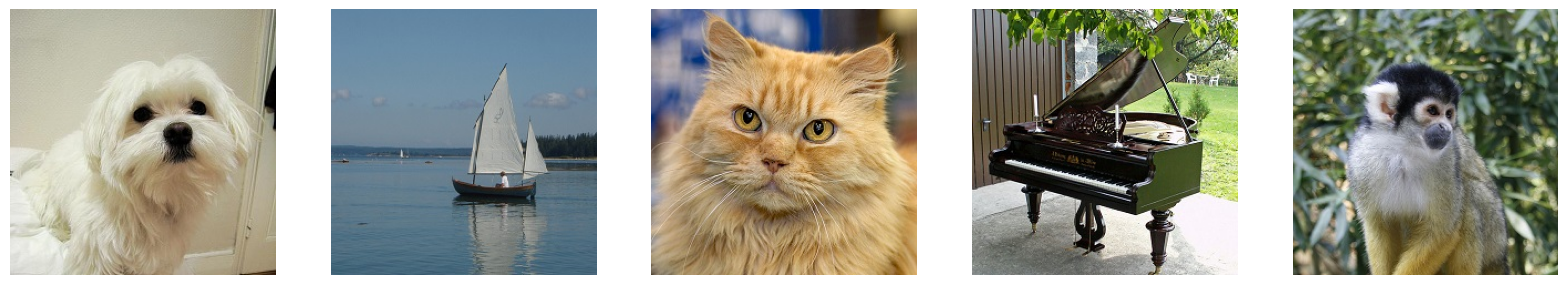

In [10]:
# 원본 이미지가 들어갈 리스트 만들기
images_originals = []

# 원본 이미지가 저장된 폴더에서 하나씩 img 불러서 리스트에 담기
for img in glob.glob(path +'/*.jpg'):
  images_originals.append(mpimg.imread(img))

# 이미지 크기
plt.figure(figsize=(20,20))

for i, image_o in enumerate(images_originals):
  plt.subplot(5,5, i+1)
  plt.imshow(image_o)
  plt.axis('off')

In [11]:
# 사전에 학습된 딥러닝 모델 불러오기

model = VGG16(weights='imagenet', include_top=True)
# vgg16 모들 있는 그대로 사용 (include_top=True)

553467096/553467096 [==============================] - 8s 0us/step


In [12]:
# 원본 이미지 이름과 imagenet 에서 해당 이미지 인덱스

input_list = ['maltese', 'persian_cat','squirrel_monkey','grand_piano','yawl']
imagenet_index = ['153','283','382','579','914']

In [16]:
path

'/content/data/img'

In [21]:
pwd

'/content'

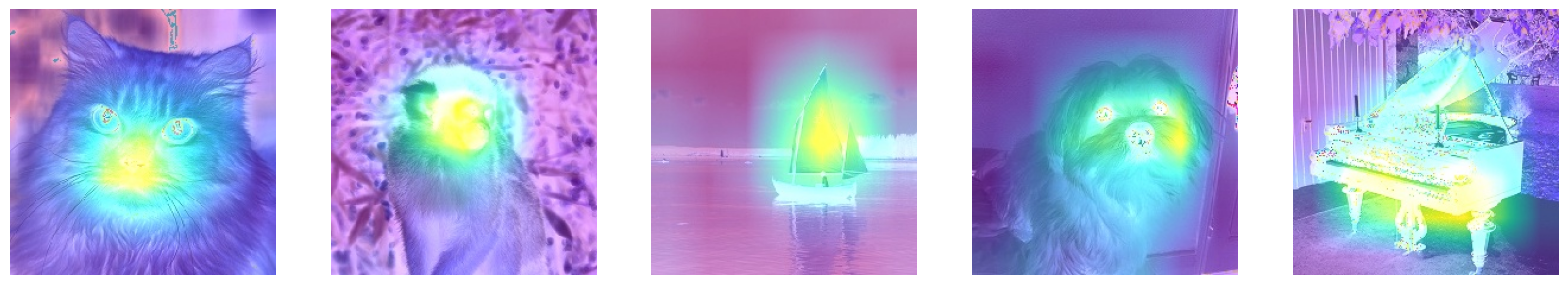

In [24]:
# gradient CAM 선택
explainer = GradCAM()

# GradCAM 알고리즘이 적용된 이미지가 들어갈 빈 리스트 생성
images_cams = []

# GradCAM 실행

for l, i in zip(input_list, imagenet_index):
  img = load_img(path +'/{}_0.jpg'.format(l), target_size=(224,224))
  img = img_to_array(img)  # img (2차원 >> 1차원 배열)

  data = ([img], None)
  grid = explainer.explain(data, model, int(i))
  # [GradCAM]explainer(데이터, 모델, 클래스)
  explainer.save(grid, ".", path+'/{}_cam.jpg'.format(l))
  # [GradCAM]explainer.save(output,저장될 폴더, 저장될 이름)

# GradCAM 적용된 이미지 불러오는 부분
plt.figure(figsize=(20,20))

for img in glob.glob(path +'/*_cam.jpg'):
  images_cams.append(mpimg.imread(img))

for i, image_c in enumerate(images_cams):
  plt.subplot(5, 5, i+1)
  plt.imshow(image_c)
  plt.axis('off')

In [25]:
# 폐쇄성 민감도(OcclusionSensitivity) 선택
explainer = OcclusionSensitivity()

images_occls = []

# 패치크기 설정이 추가됨(patch_size 정함)
# patch_size : 사진을 가리며 움직이는 검은색 사각형의 크기(일종의 mask)
# patch_size 크게 잡으면 >> 조금 더 넓은 범위의 결과가 나옴
# patch_size 작게 잡으면 >> 조금 더 세밀한 부분을 가리키는 결과가 나옴

In [27]:
patch_size = 40
# patch_size = 20

2/2 [==============================] - 22s 2s/step


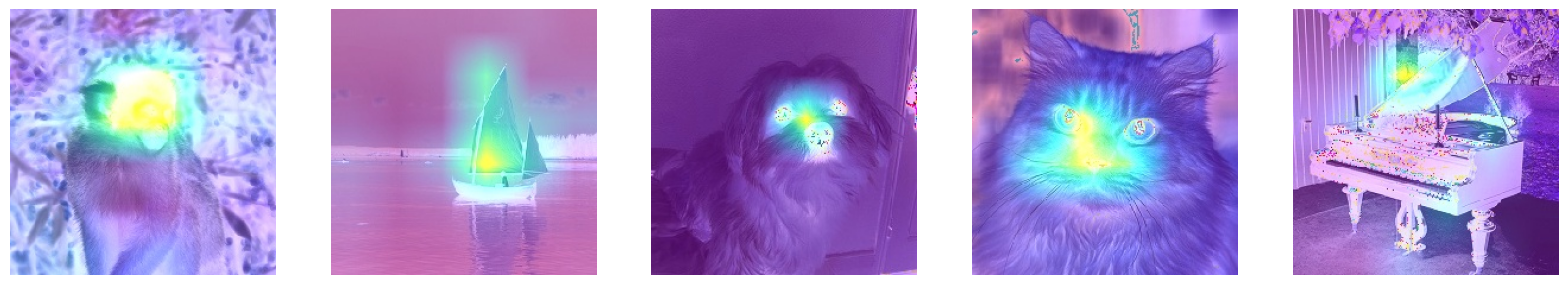

In [29]:
for l, i in zip(input_list, imagenet_index):
  img = load_img(path +'/{}_0.jpg'.format(l), target_size=(224,224))
  img = img_to_array(img)  # img (2차원 >> 1차원 배열)

  data = ([img], None)

  occls = explainer.explain(data, model, int(i), patch_size)
  # [occls]explainer(데이터, 모델, 클래스, patch_size)
  explainer.save(occls, ".", path+'/{}_occl.jpg'.format(l))
  # [occls]explainer.save(output,저장될 폴더, 저장될 이름)

# occls 적용된 이미지 불러오는 부분
plt.figure(figsize=(20,20))

for img in glob.glob(path +'/*_occl.jpg'):
  images_occls.append(mpimg.imread(img))

for i, image_occl in enumerate(images_occls):
  plt.subplot(5, 5, i+1)
  plt.imshow(image_occl)
  plt.axis('off')